[![Open Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/123SVymuhF1BESHzoaDEZu0kI4rhQLO1k?usp=sharing)

In [ ]:
import zipfile
import os

# Path to the uploaded zip file
zip_file_path = '/content/I.zip'

# Directory to extract the contents of the zip file
extracted_folder_path = '/content/I/'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Listing the extracted files
extracted_files = os.listdir(extracted_folder_path)
extracted_files.sort()
extracted_files


['Animals']

In [ ]:
# Path to the extracted "Animals" folder
animals_folder_path = os.path.join(extracted_folder_path, 'Animals')

# Listing the files in the "Animals" folder
animals_files = os.listdir(animals_folder_path)
animals_files.sort()
animals_files


['bird', 'cat', 'dog']

In [ ]:
# Paths to the subfolders within the "Animals" folder
bird_folder_path = os.path.join(animals_folder_path, 'bird')
cat_folder_path = os.path.join(animals_folder_path, 'cat')
dog_folder_path = os.path.join(animals_folder_path, 'dog')

# Listing the files in each subfolder
bird_files = os.listdir(bird_folder_path)
cat_files = os.listdir(cat_folder_path)
dog_files = os.listdir(dog_folder_path)

bird_files.sort()
cat_files.sort()
dog_files.sort()

(bird_files, cat_files, dog_files)


(['00b01445_nohash_0.wav',
  '00f0204f_nohash_1.wav',
  '00f0204f_nohash_3.wav',
  '01648c51_nohash_0.wav',
  '01bcfc0c_nohash_1.wav',
  '0474c92a_nohash_0.wav',
  '095847e4_nohash_0.wav',
  '096456f9_nohash_0.wav',
  '09bcdc9d_nohash_0.wav',
  '0a7c2a8d_nohash_0.wav',
  '0b40aa8e_nohash_0.wav',
  '0b56bcfe_nohash_0.wav',
  '0bde966a_nohash_0.wav',
  '0f7dc557_nohash_0.wav',
  '12c206ea_nohash_0.wav',
  '13199b79_nohash_1.wav',
  '1942abd7_nohash_0.wav',
  '1a6eca98_nohash_0.wav',
  '1b4c9b89_nohash_0.wav',
  '1bc45db9_nohash_0.wav',
  '1bc45db9_nohash_1.wav',
  '1d1fe0a0_nohash_0.wav',
  '1ed557b9_nohash_0.wav',
  '1f3bece8_nohash_0.wav',
  '214ccb20_nohash_0.wav',
  '214ccb20_nohash_1.wav',
  '215699ff_nohash_1.wav',
  '2296b1af_nohash_1.wav',
  '24c9f572_nohash_1.wav',
  '257e17e0_nohash_0.wav',
  '270bfa52_nohash_0.wav',
  '27b03931_nohash_0.wav',
  '28ed6bc9_nohash_0.wav',
  '29fb33da_nohash_0.wav',
  '2b42e7a2_nohash_0.wav',
  '2c7c33e8_nohash_0.wav',
  '30a09789_nohash_1.wav',
 

In [ ]:
import wave
import contextlib

# Function to load and display properties of a few audio files using the wave library
def load_and_display_audio_properties_wave(file_paths, category_name, num_samples=5):
    properties = []
    for file in file_paths[:num_samples]:
        file_path = os.path.join(animals_folder_path, category_name, file)
        with contextlib.closing(wave.open(file_path, 'rb')) as f:
            frames = f.getnframes()
            rate = f.getframerate()
            duration = frames / float(rate)
            properties.append({
                "File": file,
                "Sample Rate": rate,
                "Duration (seconds)": duration,
                "Channels": f.getnchannels()
            })
    return properties

# Load and display properties for a few files from each category using wave library
bird_audio_properties_wave = load_and_display_audio_properties_wave(bird_files, 'bird')
cat_audio_properties_wave = load_and_display_audio_properties_wave(cat_files, 'cat')
dog_audio_properties_wave = load_and_display_audio_properties_wave(dog_files, 'dog')

(bird_audio_properties_wave, cat_audio_properties_wave, dog_audio_properties_wave)


([{'File': '00b01445_nohash_0.wav',
   'Sample Rate': 16000,
   'Duration (seconds)': 1.0,
   'Channels': 1},
  {'File': '00f0204f_nohash_1.wav',
   'Sample Rate': 16000,
   'Duration (seconds)': 1.0,
   'Channels': 1},
  {'File': '00f0204f_nohash_3.wav',
   'Sample Rate': 16000,
   'Duration (seconds)': 1.0,
   'Channels': 1},
  {'File': '01648c51_nohash_0.wav',
   'Sample Rate': 16000,
   'Duration (seconds)': 1.0,
   'Channels': 1},
  {'File': '01bcfc0c_nohash_1.wav',
   'Sample Rate': 16000,
   'Duration (seconds)': 1.0,
   'Channels': 1}],
 [{'File': '00f0204f_nohash_2.wav',
   'Sample Rate': 16000,
   'Duration (seconds)': 1.0,
   'Channels': 1},
  {'File': '03cf93b1_nohash_0.wav',
   'Sample Rate': 16000,
   'Duration (seconds)': 0.896,
   'Channels': 1},
  {'File': '095847e4_nohash_0.wav',
   'Sample Rate': 16000,
   'Duration (seconds)': 1.0,
   'Channels': 1},
  {'File': '096456f9_nohash_0.wav',
   'Sample Rate': 16000,
   'Duration (seconds)': 1.0,
   'Channels': 1},
  {'Fil

In [ ]:
import soundfile as sf

# Function to normalize the duration of audio files
def normalize_audio_duration(file_paths, category_name, target_duration=1.0, sample_rate=16000):
    normalized_files = []
    for file in file_paths:
        file_path = os.path.join(animals_folder_path, category_name, file)
        audio, sr = sf.read(file_path)

        # If the audio is shorter than the target duration, pad it
        if len(audio) < target_duration * sr:
            padding = int((target_duration * sr) - len(audio))
            audio = np.pad(audio, (0, padding), mode='constant')

        # If the audio is longer than the target duration, trim it
        elif len(audio) > target_duration * sr:
            audio = audio[:int(target_duration * sr)]

        # Save the normalized audio to a new file
        normalized_file_path = os.path.join(animals_folder_path, category_name, 'normalized_' + file)
        sf.write(normalized_file_path, audio, sr)
        normalized_files.append(normalized_file_path)

    return normalized_files

# Normalize the duration for a few files from each category
normalized_bird_files = normalize_audio_duration(bird_files[:5], 'bird')
normalized_cat_files = normalize_audio_duration(cat_files[:5], 'cat')
normalized_dog_files = normalize_audio_duration(dog_files[:5], 'dog')

(normalized_bird_files, normalized_cat_files, normalized_dog_files)


(['/content/I/Animals/bird/normalized_00b01445_nohash_0.wav',
  '/content/I/Animals/bird/normalized_00f0204f_nohash_1.wav',
  '/content/I/Animals/bird/normalized_00f0204f_nohash_3.wav',
  '/content/I/Animals/bird/normalized_01648c51_nohash_0.wav',
  '/content/I/Animals/bird/normalized_01bcfc0c_nohash_1.wav'],
 ['/content/I/Animals/cat/normalized_00f0204f_nohash_2.wav',
  '/content/I/Animals/cat/normalized_03cf93b1_nohash_0.wav',
  '/content/I/Animals/cat/normalized_095847e4_nohash_0.wav',
  '/content/I/Animals/cat/normalized_096456f9_nohash_0.wav',
  '/content/I/Animals/cat/normalized_0e5193e6_nohash_0.wav'],
 ['/content/I/Animals/dog/normalized_012c8314_nohash_0.wav',
  '/content/I/Animals/dog/normalized_0132a06d_nohash_0.wav',
  '/content/I/Animals/dog/normalized_01d22d03_nohash_0.wav',
  '/content/I/Animals/dog/normalized_026290a7_nohash_0.wav',
  '/content/I/Animals/dog/normalized_037c445a_nohash_0.wav'])

In [ ]:
from scipy.io import wavfile
from scipy.fftpack import dct

# Function to calculate Mel Frequency Cepstral Coefficients (MFCC)
def calculate_mfcc(file_path, num_ceps=13, n_filters=26, n_fft=512, hop_length=160):
    # Load the audio file
    sample_rate, signal = wavfile.read(file_path)

    # Pre-Emphasis
    pre_emphasis = 0.97
    emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

    # Framing
    frame_size, frame_stride = 0.025, 0.01  # 25ms, 10ms
    frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
    signal_length = len(emphasized_signal)
    frame_length = int(round(frame_length))
    frame_step = int(round(frame_step))
    num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

    pad_signal_length = num_frames * frame_step + frame_length
    z = np.zeros((pad_signal_length - signal_length))
    pad_signal = np.append(emphasized_signal, z)  # Pad signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

    indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
    frames = pad_signal[indices.astype(np.int32, copy=False)]

    # Window
    frames *= np.hamming(frame_length)

    # Fourier-Transform and Power Spectrum
    NFFT = n_fft
    mag_frames = np.absolute(np.fft.rfft(frames, NFFT))  # Magnitude of the FFT
    pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum

    # Filter Banks
    low_freq_mel = 0
    high_freq_mel = (2595 * np.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
    mel_points = np.linspace(low_freq_mel, high_freq_mel, n_filters + 2)  # Equally spaced in Mel scale
    hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
    bin = np.floor((NFFT + 1) * hz_points / sample_rate)

    fbank = np.zeros((n_filters, int(np.floor(NFFT / 2 + 1))))
    for m in range(1, n_filters + 1):
        f_m_minus = int(bin[m - 1])   # left
        f_m = int(bin[m])             # center
        f_m_plus = int(bin[m + 1])    # right

        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])

    filter_banks = np.dot(pow_frames, fbank.T)
    filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability
    filter_banks = 20 * np.log10(filter_banks)  # dB

    # MFCCs
    mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)]  # Keep 2-13

    return mfcc

# Test the function with one audio file from each category
mfcc_bird_sample = calculate_mfcc(normalized_bird_files[0])
mfcc_cat_sample = calculate_mfcc(normalized_cat_files[0])
mfcc_dog_sample = calculate_mfcc(normalized_dog_files[0])

(mfcc_bird_sample.shape, mfcc_cat_sample.shape, mfcc_dog_sample.shape)  # Displaying the shape of the MFCC features for a sample file from each category



((98, 13), (98, 13), (98, 13))

In [ ]:
# Extract MFCC features for all normalized audio files in each category
def extract_mfcc_for_all_files(file_paths):
    return [calculate_mfcc(file_path) for file_path in file_paths]

# Extracting MFCC features for all normalized files
mfcc_features_bird = extract_mfcc_for_all_files(normalized_bird_files)
mfcc_features_cat = extract_mfcc_for_all_files(normalized_cat_files)
mfcc_features_dog = extract_mfcc_for_all_files(normalized_dog_files)

# Checking the number of files processed in each category
(len(mfcc_features_bird), len(mfcc_features_cat), len(mfcc_features_dog))


(5, 5, 5)

In [ ]:
from sklearn.decomposition import PCA

# Function to flatten MFCC features and apply PCA for dimensionality reduction
def apply_pca_to_mfcc(mfcc_features, n_components=2):
    # Flatten the MFCC features
    flattened_mfcc = np.array([mfcc.flatten() for mfcc in mfcc_features])

    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_features = pca.fit_transform(flattened_mfcc)

    return pca_features

# Apply PCA to the MFCC features of each category
pca_features_bird = apply_pca_to_mfcc(mfcc_features_bird)
pca_features_cat = apply_pca_to_mfcc(mfcc_features_cat)
pca_features_dog = apply_pca_to_mfcc(mfcc_features_dog)

# Shapes of the PCA features for each category
(pca_features_bird.shape, pca_features_cat.shape, pca_features_dog.shape)


((5, 2), (5, 2), (5, 2))

In [ ]:
from sklearn.cluster import KMeans

# Concatenate all PCA features for clustering
all_pca_features = np.concatenate([pca_features_bird, pca_features_cat, pca_features_dog])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(all_pca_features)

# Retrieve the cluster labels
cluster_labels = kmeans.labels_

cluster_labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1], dtype=int32)

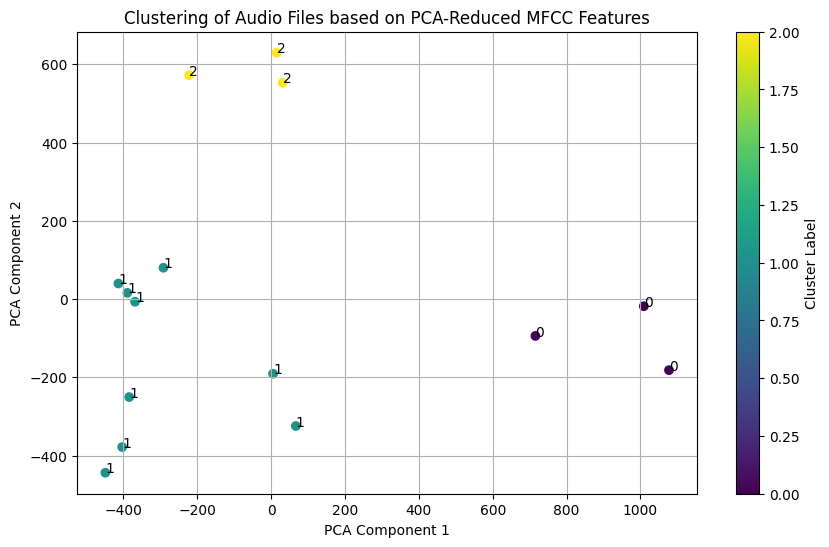

In [ ]:
import matplotlib.pyplot as plt

# Visualizing the final clustering map
plt.figure(figsize=(10, 6))
plt.scatter(all_pca_features[:, 0], all_pca_features[:, 1], c=cluster_labels, cmap='viridis', marker='o')

# Annotating the points
for i, txt in enumerate(cluster_labels):
    plt.annotate(txt, (all_pca_features[i, 0], all_pca_features[i, 1]))

plt.title('Clustering of Audio Files based on PCA-Reduced MFCC Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()
